In [ ]:
!pip install pandas

In [ ]:
!pip install pyarrow
!pip install fastparquet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Read a Parquet file
path = r'/content/drive/My Drive/Colab Notebooks/NLP/chatbot/train-00000-of-00006-f8cc7498b1ca040f.parquet'
df = pd.read_parquet(path)


In [ ]:
df.head

<bound method NDFrame.head of                                                    prompt  \
0       Give me some examples of ways to make money wi...   
1       Human: Provide the titles of some television s...   
2       \n\nHuman: What is the scientific definition o...   
3       Human: META] Impact of this subreddit I don't ...   
4       Human: UK engineers, what's the deal with your...   
...                                                   ...   
249033  \n\nHuman: What is medical marijuana used for?...   
249034  \n\nHuman: Search for a chicken nacho recipe\n...   
249035  Human: Help my review designs before I post th...   
249036  Human: I haven't cooked anything in a while. W...   
249037  \n\nHuman: Is it true that Ozzy Osbourne bit t...   

                                                 response  \
0        - Selling stuff on eBay\n- Freelancing\n- Inv...   
1        Likely because they assist with various devel...   
2        It’s certainly correct that planets and stars

In [ ]:
df.shape

(249038, 3)

In [ ]:
df.loc[:1]

,prompt,response,text
0,Give me some examples of ways to make money wi...,- Selling stuff on eBay\n- Freelancing\n- Inv...,####Human####: \nGive me some examples of ways...
1,Human: Provide the titles of some television s...,Likely because they assist with various devel...,####Human####: \nProvide the titles of some te...


In [ ]:
# df.loc[:2]['prompt'][1]

In [ ]:
df.loc[:1]['text'][1]

"####Human####: \nProvide the titles of some television shows specifically for children. \n\n####Assistant####: \n1. Bubble Guppies\n2. Sesame Street\n3. PJ Masks\n4. Peppa Pig\n5. Mickey Mouse Clubhouse\n6. Blue's Clues\n7. Doc McStuffins\n8. Daniel Tiger's Neighborhood\n9. PAW Patrol\n10. The Lion Guard \n\n####Human####: \nI'm looking for something with a bit more of an educational angle. Can you recommend some educational television shows designed for children?\n\n####Assistant####: \nCertainly! Some educational aids for children on TV would involve program like Cyberchase, The Magic School Bus,WordGirl, Wild Kratts, Doki, and Bone Detective. Are those more along the lines of what you're looking for?\n\n####Human####: \nYes, those are exactly what I had in mind! Why did I decide to ask these types of shows?\n\n####Assistant####: \nLikely because they assist with various developmental skills in a fun and engaging way. Educational television shows for children can encourage a love of

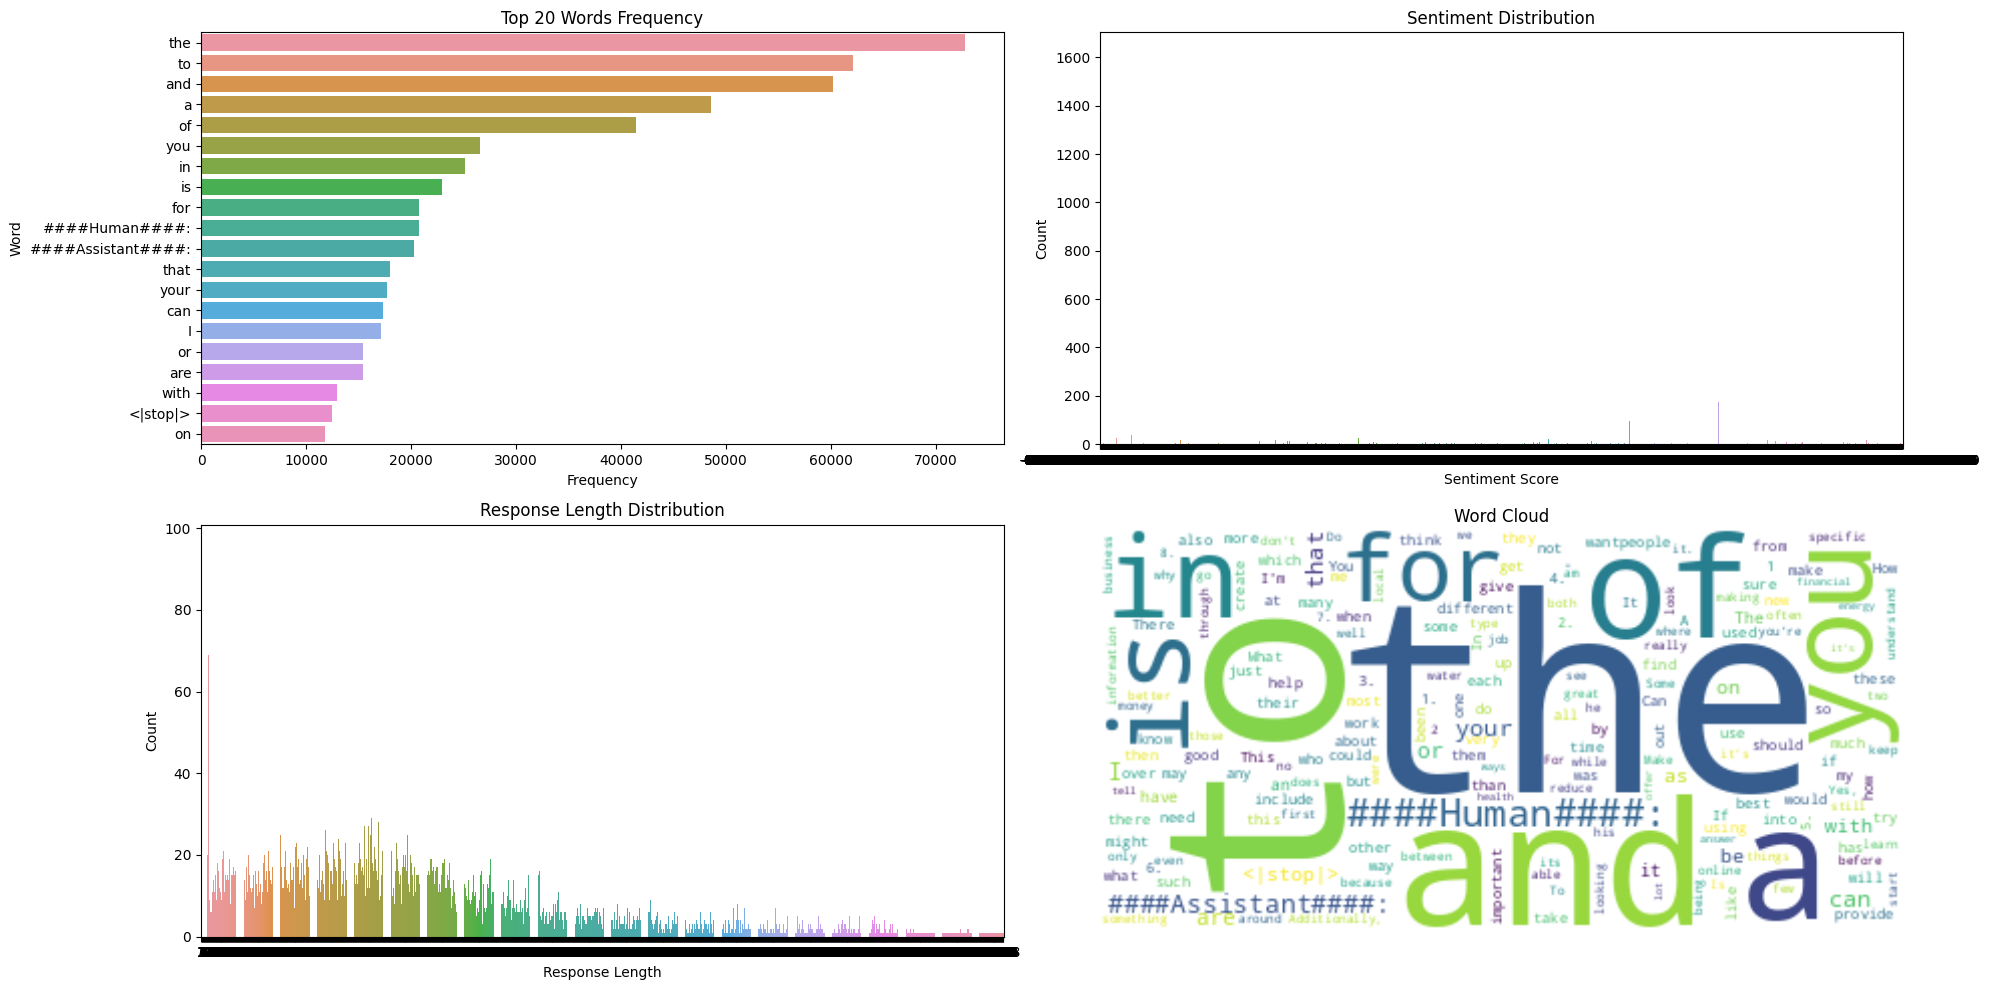

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter

# Assuming df is your DataFrame with the 'cleaned_text' column


# If you want a reproducible subset, you can set a random state
# To take 1/50th of the data randomly
subset_df = df.sample(frac=0.05, random_state=42)

# 1. Frequency Distribution of Words
all_words = ' '.join(subset_df['text']).split()
word_freq = Counter(all_words)
freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

# 2. Sentiment Analysis
# We will analyze sentiment of the responses only
subset_df['response_sentiment'] = subset_df['response'].apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_df = pd.DataFrame(subset_df['response_sentiment'].value_counts()).reset_index()
sentiment_df.columns = ['Sentiment Score', 'Count']

# 3. Response Length Analysis
subset_df['response_length'] = subset_df['response'].apply(len)
length_df = pd.DataFrame(subset_df['response_length'].value_counts()).reset_index()
length_df.columns = ['Response Length', 'Count']

# Plotting
plt.figure(figsize=(20, 10))

# Frequency Distribution Plot
plt.subplot(2, 2, 1)
sns.barplot(data=freq_df, x='Frequency', y='Word')
plt.title('Top 20 Words Frequency')

# Sentiment Analysis Plot
plt.subplot(2, 2, 2)
sns.barplot(data=sentiment_df, x='Sentiment Score', y='Count')
plt.title('Sentiment Distribution')

# Response Length Plot
plt.subplot(2, 2, 3)
sns.barplot(data=length_df, x='Response Length', y='Count')
plt.title('Response Length Distribution')

# Word Cloud
plt.subplot(2, 2, 4)
wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud')


plt.tight_layout()
plt.show()


In [ ]:
# df.loc[:2]['response'][1]

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def categorize_questions(questions):
    stop_words = set(stopwords.words('english'))

    # Extracting key nouns from the questions as potential categories
    categories = defaultdict(int)
    for question in questions:
        words = word_tokenize(question)
        words = [word for word in words if word.isalpha() and word not in stop_words]
        tags = pos_tag(words)

        for word, tag in tags:
            if tag in ['NN', 'NNS', 'NNP', 'NNPS']:  # Nouns and proper nouns
                categories[word.lower()] += 1

    # Selecting the most common noun as the category
    if categories:
        most_common_category = max(categories, key=categories.get)
    else:
        most_common_category = "General"

    return most_common_category

# Example usage with the provided data
# category = categorize_questions(sample_questions)
# category

In [ ]:
import pandas as pd
import json
import re
from collections import defaultdict

# Function to extract questions and answers from text
def extract_qa_pairs(text):
    pairs = text.split("\n\n")
    questions, answers = [], []
    for pair in pairs:
        if "####Human####:" in pair:
            question = pair.replace("####Human####:", "").strip()
            questions.append(question)
        elif "####Assistant####:" in pair:
            answer = pair.replace("####Assistant####:", "").strip()
            answers.append(answer)
    return questions, answers


In [ ]:
# Extract the data and save as json
intents = []

for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing Intents"):
    questions, answers = extract_qa_pairs(row['text'])
    category = categorize_questions(questions)
    intent = {
        "tag": category,
        "patterns": questions,
        "responses": answers,
        "context_set": ""
    }
    intents.append(intent)

# Save to JSON
output = {"intents": intents}
with open('output.json', 'w') as f:
    json.dump(output, f, indent=4)

In [ ]:
import json
import pickle
import nltk
import numpy as np
from nltk.stem.lancaster import LancasterStemmer
from scipy.sparse import lil_matrix
from tqdm import tqdm

def create_training_data(data, model_filename):

    Stemmer = LancasterStemmer()

    words = {Stemmer.stem(word.lower()) for intent in tqdm(data['intents'], desc="Processing words") for pattern in intent['patterns'] for word in nltk.word_tokenize(pattern) if word != '?'}
    labels = sorted({intent['tag'] for intent in data['intents']})

    for intent in tqdm(data['intents'], desc="Extending labels"):
        if "more" in intent:
            labels.extend(intent['tag'] + '_' + more + '_' + keys for more in intent['more'] for keys in intent['more'][more])

    training_size = sum(len(intent['patterns']) for intent in data['intents'])
    training = lil_matrix((training_size, len(words)), dtype=int)
    output = lil_matrix((training_size, len(labels)), dtype=int)

    row_index = 0
    for intent in tqdm(data['intents'], desc="Creating training data"):
        for pattern in intent['patterns']:
            words_in_pattern = [Stemmer.stem(word) for word in nltk.word_tokenize(pattern)]
            training[row_index, :] = [1 if word in words_in_pattern else 0 for word in words]
            output[row_index, labels.index(intent['tag'])] = 1
            row_index += 1

        if "more" in intent:
            for more in intent['more']:
                for keys in intent['more'][more]:
                    tag = intent['tag'] + '_' + more + '_' + keys
                    doc = ['what', 'is', intent['tag'], more, keys]
                    training[row_index, :] = [1 if Stemmer.stem(word) in doc else 0 for word in words]
                    output[row_index, labels.index(tag)] = 1
                    row_index += 1

    training = training.tocsr()
    output = output.tocsr()

    with open(model_filename, 'wb') as file:
        pickle.dump((sorted(words), labels, training, output), file)


In [ ]:
import json
filename = r'/content/drive/My Drive/Colab Notebooks/NLP/chatbot/intent_data.json'

with open(filename) as file:
    data = json.load(file)

In [ ]:
filename = r'/content/drive/My Drive/Colab Notebooks/NLP/chatbot/model_data2.pickle'
create_training_data(data, filename)

Creating training data: 100%|██████████| 182303/182303 [2:36:52<00:00, 19.37it/s]


In [ ]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

In [ ]:
# import tensorflow as tf
# print(tf.__version__)

2.14.0


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.sparse import csr_matrix

class CustomModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(CustomModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x


def train_model(model, training_data, output_data, epochs, batch_size, optimizer, criterion):
    model.train()

    # Use shape[0] instead of len() for sparse matrices
    num_samples = training_data.shape[0] if isinstance(training_data, csr_matrix) else len(training_data)

    for epoch in range(epochs):
        total_loss = 0
        for i in range(0, num_samples, batch_size):
            batch_end = min(i + batch_size, num_samples)
            inputs = training_data[i:batch_end]
            labels = output_data[i:batch_end]

            # Convert sparse CSR matrix to PyTorch tensor
            if isinstance(inputs, csr_matrix):
                inputs = torch.tensor(inputs.toarray()).float()
            if isinstance(labels, csr_matrix):
                labels = torch.tensor(labels.toarray()).float()

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Free up memory
            del inputs, labels, outputs, loss
            torch.cuda.empty_cache()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/num_samples}")


def load_model(model, filename):
    model.load_state_dict(torch.load(filename))

def save_model(model, filename):
    torch.save(model.state_dict(), filename)

def save_everything(model, data, filename):
    # Serialize the model architecture
    model_pickle = pickle.dumps(model)

    # Save model architecture, state_dict, and training data
    torch.save({
        'model_architecture': model_pickle,
        'model_state_dict': model.state_dict(),
        'training_data': data
        # Add other components as needed
    }, filename)

def load_everything(filename):
    # Load the saved file
    checkpoint = torch.load(filename)

    # Deserialize the model architecture
    model = pickle.loads(checkpoint['model_architecture'])
    model.load_state_dict(checkpoint['model_state_dict'])

    # Load training data
    data = checkpoint['training_data']

    return model, data

def create_and_train_dnn_model(training, output, train=False):
    # Assuming 'training' is a sparse matrix and its second dimension represents the features
    input_size = training.shape[1]
    output_size = output.shape[1]  # Assuming 'output' is one-hot encoded and sparse

    model = CustomModel(input_size, output_size)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    if train:
        train_model(model, training, output, epochs=10, batch_size=8, optimizer=optimizer, criterion=criterion)
        save_model(model, "/content/drive/My Drive/Colab Notebooks/NLP/chatbot/chat_bot_model.pth")
    else:
        load_model(model, "/content/drive/My Drive/Colab Notebooks/NLP/chatbot/chat_bot_model.pth")

    return model



In [ ]:
def getTraingAndOutputData(filename):

    with open(filename, 'rb') as file:
        print('File ------------------------> ', file)
        WORDS, LABELS, training, output = pickle.load(file)
    return WORDS, LABELS, training, output, data

In [ ]:
import pickle

In [ ]:
filename = r'/content/drive/My Drive/Colab Notebooks/NLP/chatbot/model_data.pickle'
WORDS, LABELS, training, output, data = getTraingAndOutputData(filename)
print(type(training))
print(type(output))


File ------------------------>  <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/NLP/chatbot/model_data.pickle'>
<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
# serialized_data_filename = r'/content/drive/My Drive/Colab Notebooks/NLP/chatbot/model_data.pickle'
model = create_and_train_dnn_model(training, output, train=True)


Epoch 1/10, Loss: 1.1633204520009508
Epoch 2/10, Loss: 1.1609804745609715
Epoch 3/10, Loss: 1.1602968542730179
Epoch 4/10, Loss: 1.1599879411112441
Epoch 5/10, Loss: 1.1596801402723287
Epoch 6/10, Loss: 1.159517538286063
Epoch 7/10, Loss: 1.1594062950173125
Epoch 8/10, Loss: 1.159322826479229
Epoch 9/10, Loss: 1.1592443820814164
Epoch 10/10, Loss: 1.1591809153996266


In [ ]:
import torch

# Load your dataset
file_path = '/content/drive/My Drive/Colab Notebooks/NLP/chatbot/path_to_your_dataset.pth'  # Update this with the actual path
dataset = torch.load(file_path)

# Preprocess the dataset
# Depending on your exact dataset structure, you might need to adjust the preprocessing
def preprocess_dataset(dataset):
    inputs = []
    labels = []
    for intent in dataset:
        for pattern in intent['patterns']:
            inputs.append(pattern)
            labels.append(intent['tag'])
    return inputs, labels

inputs, labels = preprocess_dataset(dataset)
